In [3]:
from kawin.KWNEuler import PrecipitateModel
from kawin.Thermodynamics import BinaryThermodynamics
from kawin.ElasticFactors import StrainEnergy
from kawin.Surrogate import BinarySurrogate
import numpy as np
import matplotlib.pyplot as plt

model = PrecipitateModel(1e-3, 1e5, 5000, phases=['CU4TI'], linearTimeSpacing=False, elements=['TI'])
model.setConstraints(minRadius=0.3e-10)

therm = BinaryThermodynamics('CuTi.tdb', ['CU', 'TI'], ['FCC_A1', 'CU4TI'], interfacialCompMethod='equilibrium')
therm.setMobilityCorrection('all', 100)
therm.setGuessComposition(0.17)

model.setInitialComposition(0.019)
model.setTemperature(350 + 273.15)
model.setInterfacialEnergy(0.035)

model.setThermodynamics(therm)

VmAlpha = 7.11e-6
model.setVmAlpha(VmAlpha, 4)

VmBeta = 7.628e-6
model.setVmBeta(VmBeta, 20)
#print(model.VmBeta)

model.setNucleationSite('bulk')
#model.setNucleationDensity(bulkN0=1e30)
model.setNucleationDensity(bulkN0=8.4699e28)
#model.setNucleationDensity(dislocationDensity=1e30)

se = StrainEnergy()
se.setInterfacialEnergyMethod('eqradius')
se.setElasticConstants(168.4e9, 121.4e9, 75.4e9)
se.setEigenstrain([0.022, 0.022, 0.003])

In [4]:
model.solve(verbose=True, vIt=1000)

model.save('outputs//CuTi_TC_sphere')

c:\Users\nury\AppData\Local\Programs\Python\Python310\lib\site-packages\pycalphad\core\utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


N	Time (s)	Temperature (K)	Matrix Comp
1000	4.0e-02		623		1.9000

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	0.000e+00		0.0000		0.0000e+00	2.3517e+03

N	Time (s)	Temperature (K)	Matrix Comp
2000	1.6e+00		623		1.9000

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	0.000e+00		0.0000		0.0000e+00	2.3517e+03

N	Time (s)	Temperature (K)	Matrix Comp
3000	3.8e+01		623		1.8997

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	4.294e+22		0.0020		4.7374e-10	2.3516e+03

N	Time (s)	Temperature (K)	Matrix Comp
4000	5.6e+02		623		0.1958

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	1.595e+25		9.2475		1.0683e-09	5.0433e+02

N	Time (s)	Temperature (K)	Matrix Comp
5000	2.2e+04		623		0.1407

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	1.194e+24		9.6667		2.5688e-09	2.0372e+02

Finished in 27.366 seconds.


In [5]:
model.reset()
therm.clearCache()
model.setStrainEnergy(se, calculateAspectRatio=True)

#Set precipitate shape
#Since we're calculating the aspect ratio, it does not have to be defined
#Otherwise, a constant value or function can be inputted
model.setAspectRatioNeedle()

model.solve(verbose=True, vIt=2000)
model.save('outputs//CuTi_TC_needle')

N	Time (s)	Temperature (K)	Matrix Comp
2000	1.6e+00		623		1.9000

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	0.000e+00		0.0000		0.0000e+00	1.9651e+03

N	Time (s)	Temperature (K)	Matrix Comp
4000	6.0e+02		623		0.2778

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	1.037e+25		8.6851		1.2071e-09	4.3140e+02

N	Time (s)	Temperature (K)	Matrix Comp
6000	1.9e+04		623		0.2050

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	CU4TI	8.069e+23		9.1644		2.8303e-09	1.5891e+02

Finished in 327.484 seconds.


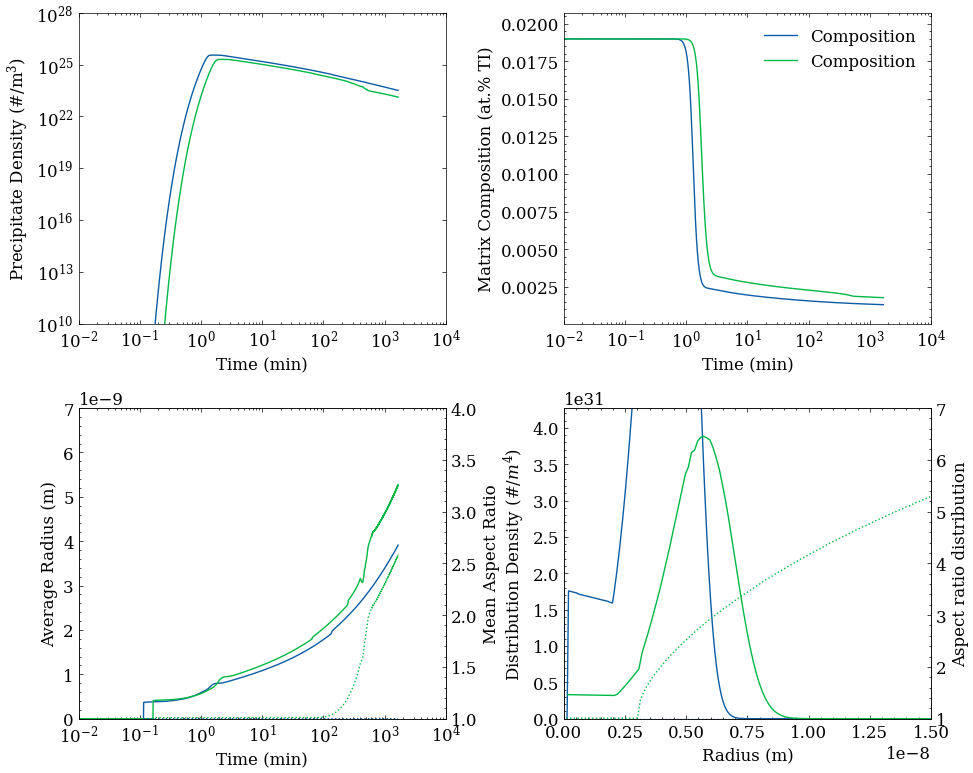

In [6]:
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10,8))

modelS = PrecipitateModel.load('outputs//CuTi_TC_sphere.npz')
modelN = PrecipitateModel.load('outputs//CuTi_TC_needle.npz')

modelS.plot(axes[0,0], 'Precipitate Density', bounds=[1e-2, 1e4], timeUnits='min')
modelN.plot(axes[0,0], 'Precipitate Density', bounds=[1e-2, 1e4], timeUnits='min')
axes[0,0].set_ylim([1e10, 1e28])
axes[0,0].set_yscale('log')

modelS.plot(axes[0,1], 'Composition', bounds=[1e-2, 1e4], timeUnits='min', label='Composition')
modelN.plot(axes[0,1], 'Composition', bounds=[1e-2, 1e4], timeUnits='min', label='Composition')
axes[0,1].legend()

modelS.plot(axes[1,0], 'Average Radius', bounds=[1e-2, 1e4], timeUnits='min', label='Radius')
modelN.plot(axes[1,0], 'Average Radius', bounds=[1e-2, 1e4], timeUnits='min', label='Radius')
axes[1,0].set_ylim([0, 7e-9])

ax1 = axes[1,0].twinx()
modelS.plot(ax1, 'Aspect Ratio', bounds=[1e-2, 1e4], timeUnits='min', label='Aspect Ratio', linestyle=':')
modelN.plot(ax1, 'Aspect Ratio', bounds=[1e-2, 1e4], timeUnits='min', label='Aspect Ratio', linestyle=':')
ax1.set_ylim([1,4])

modelS.plot(axes[1,1], 'Size Distribution Density', label='PSD')
modelN.plot(axes[1,1], 'Size Distribution Density', label='PSD')

ax2 = axes[1,1].twinx()
modelS.plot(ax2, 'Aspect Ratio Distribution', label='Aspect Ratio', linestyle=':')
modelN.plot(ax2, 'Aspect Ratio Distribution', label='Aspect Ratio', linestyle=':')
axes[1,1].set_xlim([0, 1.5e-8])
ax2.set_ylim([1,7])

fig.tight_layout()
plt.show()

In [7]:
with open('outputs//CuTi_TCresults.csv', 'r') as file:
    lines = file.readlines()
    tnn, nn, tns, ns = [], [], [], []
    trn, rn, trs, rs = [], [], [], []
    tcn, cn, tcs, cs = [], [], [], []
    lPSD, PSD, lARD, ARD = [], [], [], []
    for l in range(1, len(lines)):
        data = lines[l].split('\n')
        data = data[0].split(',')
        if data[0] != '':
            tnn.append(float(data[0]))
            nn.append(float(data[1]))
        tns.append(float(data[2]))
        ns.append(float(data[3]))

        if data[5] != '':
            trn.append(float(data[5]))
            rn.append(1e-9*float(data[6]))
        trs.append(float(data[7]))
        rs.append(1e-9*float(data[8]))

        if data[10] != '':
            tcn.append(1/60*float(data[10]))
            cn.append(float(data[11])/100)
        tcs.append(1/60*float(data[12]))
        cs.append(float(data[13]))

        if data[15] != '':
            lPSD.append(1e-9*float(data[15]))
            PSD.append(float(data[16]))
            lARD.append(1e-9*float(data[17]))
            ARD.append(float(data[18]))

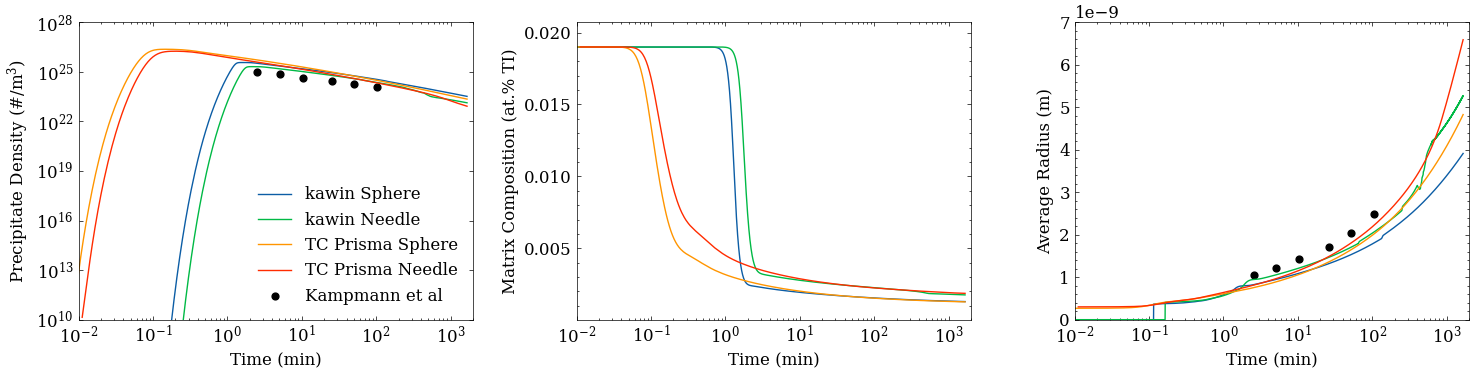

In [6]:
import matplotlib.pyplot as plt

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 12})

#fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig, axes = plt.subplots(1, 3, figsize=(15,4))

modelS = PrecipitateModel.load('outputs//CuTi_TC_sphere.npz')
modelN = PrecipitateModel.load('outputs//CuTi_TC_needle.npz')

modelS.plot(axes[0], 'Precipitate Density', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Sphere')
modelN.plot(axes[0], 'Precipitate Density', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Needle')
axes[0].plot(tns, ns, label='TC Prisma Sphere')
axes[0].plot(tnn, nn, label='TC Prisma Needle')
expt = [2.536, 5.028, 10.5, 25.43, 50.78, 102]
expn = np.array([9.97, 7.1, 3.97, 2.83, 1.92, 1.2])*1e24
axes[0].scatter(expt, expn, color='k', s=24, label='Kampmann et al')
axes[0].set_ylim([1e10, 1e28])
axes[0].set_yscale('log')
#axes[0].set_xscale('linear')

modelS.plot(axes[1], 'Composition', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Sphere')
modelN.plot(axes[1], 'Composition', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Needle')
axes[1].plot(tcs, cs, label='TC Prisma Sphere')
axes[1].plot(tcn, cn, label='TC Prisma Needle')

#axes[0,1].set_xscale('linear')

modelS.plot(axes[2], 'Average Radius', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Sphere')
modelN.plot(axes[2], 'Average Radius', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Needle')
axes[2].plot(trs, rs, label='TC Prisma Sphere')
axes[2].plot(trn, rn, label='TC Prisma Needle')
expt = [2.564, 5.048, 10.39, 26.13, 52.07, 105]
expr = np.array([1.058365, 1.219546, 1.419231, 1.714729, 2.050131, 2.491979]) * 1e-9
axes[2].scatter(expt, expr, color='k', s=24, label='Kampmann et al')
axes[2].set_ylim([0, 7e-9])
#axes[2].set_xscale('linear')

axes[0].legend()

'''
modelN.plot(axes[1,1], 'Size Distribution Density', label='kawin Needle')
axes[1,1].plot(lPSD, PSD, label='TC Prisma Needle')

ax2 = axes[1,1].twinx()
modelN.plot(ax2, 'Aspect Ratio Distribution', linestyle=':')
ax2.plot(lARD, ARD, linestyle=':')
axes[1,1].set_xlim([0, 1.5e-8])
ax2.set_ylim([1,7])
axes[1,1].legend()
'''

fig.tight_layout()
plt.show()

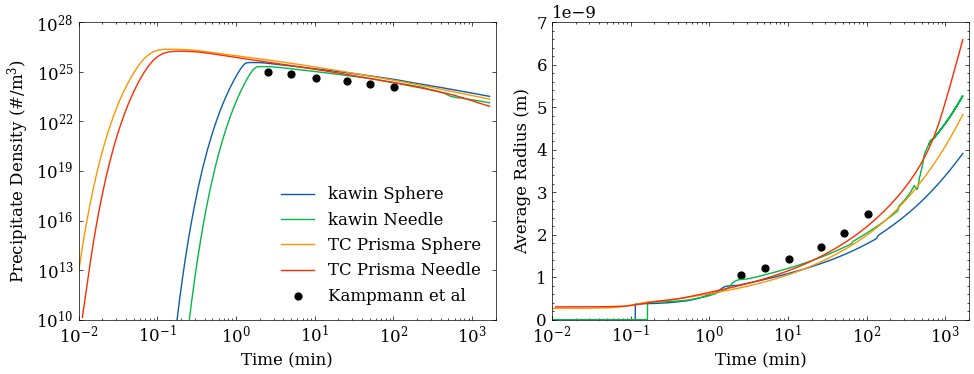

In [9]:
import matplotlib.pyplot as plt

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 12})

#fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig, axes = plt.subplots(1, 2, figsize=(10,4))

modelS = PrecipitateModel.load('outputs//CuTi_TC_sphere.npz')
modelN = PrecipitateModel.load('outputs//CuTi_TC_needle.npz')

modelS.plot(axes[0], 'Precipitate Density', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Sphere')
modelN.plot(axes[0], 'Precipitate Density', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Needle')
axes[0].plot(tns, ns, label='TC Prisma Sphere')
axes[0].plot(tnn, nn, label='TC Prisma Needle')
expt = [2.536, 5.028, 10.5, 25.43, 50.78, 102]
expn = np.array([9.97, 7.1, 3.97, 2.83, 1.92, 1.2])*1e24
axes[0].scatter(expt, expn, color='k', s=24, label='Kampmann et al')
axes[0].set_ylim([1e10, 1e28])
axes[0].set_yscale('log')
#axes[0].set_xscale('linear')

#axes[0,1].set_xscale('linear')

modelS.plot(axes[1], 'Average Radius', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Sphere')
modelN.plot(axes[1], 'Average Radius', bounds=[1e-2, 0.2e4], timeUnits='min', label='kawin Needle')
axes[1].plot(trs, rs, label='TC Prisma Sphere')
axes[1].plot(trn, rn, label='TC Prisma Needle')
expt = [2.564, 5.048, 10.39, 26.13, 52.07, 105]
expr = np.array([1.058365, 1.219546, 1.419231, 1.714729, 2.050131, 2.491979]) * 1e-9
axes[1].scatter(expt, expr, color='k', s=24, label='Kampmann et al')
axes[1].set_ylim([0, 7e-9])
#axes[2].set_xscale('linear')

axes[0].legend()

'''
modelN.plot(axes[1,1], 'Size Distribution Density', label='kawin Needle')
axes[1,1].plot(lPSD, PSD, label='TC Prisma Needle')

ax2 = axes[1,1].twinx()
modelN.plot(ax2, 'Aspect Ratio Distribution', linestyle=':')
ax2.plot(lARD, ARD, linestyle=':')
axes[1,1].set_xlim([0, 1.5e-8])
ax2.set_ylim([1,7])
axes[1,1].legend()
'''

fig.tight_layout()
plt.show()

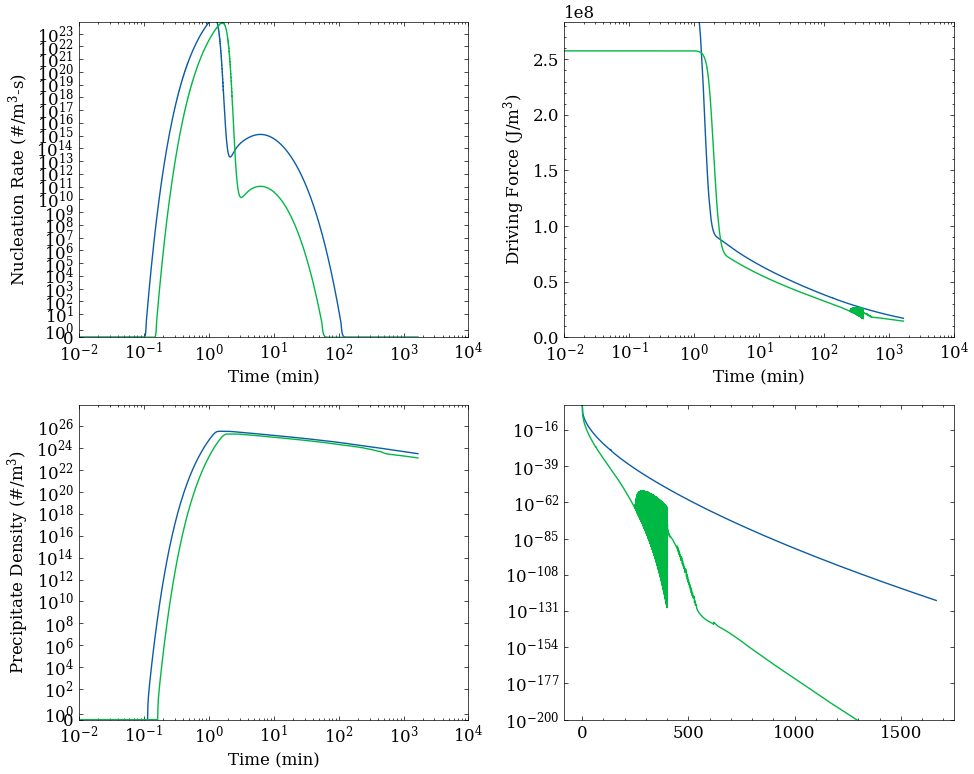

In [9]:
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

modelS = PrecipitateModel.load('outputs//CuTi_TC_sphere.npz')
modelN = PrecipitateModel.load('outputs//CuTi_TC_needle.npz')

modelS.plot(axes[0,0], 'Nucleation Rate', bounds=[1e-2, 1e4], timeUnits='min')
modelN.plot(axes[0,0], 'Nucleation Rate', bounds=[1e-2, 1e4], timeUnits='min')
#axes[0,0].set_ylim([1e-10, 1e28])
axes[0,0].set_yscale('symlog')

modelS.plot(axes[0,1], 'Driving Force', bounds=[1e-2, 1e4], timeUnits='min')
modelN.plot(axes[0,1], 'Driving Force', bounds=[1e-2, 1e4], timeUnits='min')

modelS.plot(axes[1,0], 'Precipitate Density', bounds=[1e-2, 1e4], timeUnits='min')
modelN.plot(axes[1,0], 'Precipitate Density', bounds=[1e-2, 1e4], timeUnits='min')
axes[1,0].set_ylim([1e-10, 1e28])
axes[1,0].set_yscale('symlog')

axes[1,1].plot(modelS.time/60, np.exp(-modelS.Gcrit[0, :] / (modelS.kB * (350+273))))
axes[1,1].plot(modelN.time/60, np.exp(-modelN.Gcrit[0, :] / (modelN.kB * (350+273))))
axes[1,1].set_ylim([1e-200, 1])
axes[1,1].set_yscale('log')

fig.tight_layout()
plt.show()